# 1. 音频分类任务(Audio Classification)

- Audio Classification（音频分类）的任务是为给定音频分配标签或类别。它可用于识别用户发出的指令或语句的情感，以及辨识说话者身份。

- 音频分类有如下经典使用场景：
    - 命令识别(Command Recognition)
        - 命令识别或关键词检测可将话语分类至预定义指令集。此过程通常在设备端完成，以确保快速响应。
    - 语言识别(Language Identification)
        - 目前有模型识别多大126中语言。
    - 情感识别(Emotion recognition)
        - 通过语音识别人类情感，包含喜怒哀乐等。
    - 说话人识别(Speaker Identification)
        - 说话人识别是对发言者的音频进行分类的任务，通常针对预定义的一组说话人。您可以通过此模型体验该任务。

- 语音分类任务的Pipeline类的子类是AudioClassificationPipeline。
- pipeline函数的部分参数由AudioClassificationPipeline类的构造参数确定，AudioClassificationPipeline的构造器参数包含：
    - model参数：设置模型，参数是PreTrainedModel类的子类对象。
    - feature_extractor参数：特征抽取器，这个是语音独有的特征处理器，是推理前的输入预处理对象。参数对象是SequenceFeatureExtractor类型。
    - task参数：设置任务ID。
    - num_workers参数：设置多线程工作数量，默认是8。
    - batch_size参数：设置支持的数据集批次大小，默认是1。
    - args_parser参数：设置参数解析器，参数是ArgumentHandler对象。
    - device参数：-1表示cpu，非负数表示GPU的序数。
    - dtype参数：设置参数类型，取值torch.float16, torch.bfloat16, … "auto"等。
    - binary_output参数：设置是否输出二进制数据。

## 1.1. 语音分类应用技术分析-命令识别

### (1) 模型下载

- 因为使用git下载会出现网络问题，我们使用官方的API下载：
    - 仓库ID在模型下载页面的顶部，可以直接拷贝。

In [7]:
# 需要运行命令，先安装：pip install huggingface_hub
from huggingface_hub import snapshot_download
# 下载整个模型仓库
# 示例：下载bert-base-uncased
snapshot_download(repo_id="MIT/ast-finetuned-speech-commands-v2", local_dir="F:/03Models/ast-finetuned-speech-commands-v2")

Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/342M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/342M [00:00<?, ?B/s]

preprocessor_config.json: 0.00B [00:00, ?B/s]

README.md: 0.00B [00:00, ?B/s]

.gitattributes: 0.00B [00:00, ?B/s]

'F:\\03Models\\ast-finetuned-speech-commands-v2'

### (2) 下载模型的训练数据集

In [1]:
import torchaudio
import torchaudio.datasets as datasets

# 下载数据集
speech_commands = datasets.SPEECHCOMMANDS(
    root="F:/04Datasets",  # 下载路径
    download=True,  # 如果本地没有就下载
)

# 查看数据集信息
print(f"数据集大小: {len(speech_commands)}")
print(speech_commands.get_metadata(0))
print(speech_commands[0])

# 获取一个样本
waveform, sample_rate, label, speaker_id, utterance_number = speech_commands[0]
print(f"音频形状: {waveform.shape}")
print(f"采样率：{sample_rate}")
print(f"标签: {label}")
print(f"说话人ID: {speaker_id}")
print(f"说话编号: {utterance_number}")

100%|█████████████████████████████████████████████████████████████████████████████| 2.26G/2.26G [03:49<00:00, 10.6MB/s]


数据集大小: 105829
('speech_commands_v0.02\\backward\\0165e0e8_nohash_0.wav', 16000, 'backward', '0165e0e8', 0)
(tensor([[-0.0658, -0.0709, -0.0753,  ..., -0.0700, -0.0731, -0.0704]]), 16000, 'backward', '0165e0e8', 0)
音频形状: torch.Size([1, 16000])
采样率：16000
标签: backward
说话人ID: 0165e0e8
说话编号: 0


### (3) pipeline使用

In [2]:
from transformers import pipeline
pipe = pipeline("audio-classification", model="F:/03Models/ast-finetuned-speech-commands-v2")
print(pipe)
pipe("./sounds/0a9f9af7_nohash_0.wav")

Device set to use cuda:0


C:\Program Files\Python313\Lib\site-packages\transformers\models\audio_spectrogram_transformer\feature_extraction_audio_spectrogram_transformer.py:118: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\utils\tensor_numpy.cpp:209.)
  waveform = torch.from_numpy(waveform).unsqueeze(0)


[{'score': 0.9999868869781494, 'label': 'on'},
 {'score': 1.521966055406665e-06, 'label': 'one'},
 {'score': 8.098363082353899e-07, 'label': 'two'},
 {'score': 8.005952736311883e-07, 'label': 'up'},
 {'score': 7.998626756489102e-07, 'label': 'four'},
 {'score': 7.600673939123226e-07, 'label': 'eight'},
 {'score': 7.154049512791971e-07, 'label': 'three'},
 {'score': 5.420809543466021e-07, 'label': 'down'},
 {'score': 5.212415885580413e-07, 'label': 'bed'},
 {'score': 4.490042044835718e-07, 'label': 'off'},
 {'score': 4.32777710557275e-07, 'label': 'nine'},
 {'score': 4.294376765301422e-07, 'label': 'no'},
 {'score': 4.268620159564307e-07, 'label': 'left'},
 {'score': 4.1289399632660206e-07, 'label': 'tree'},
 {'score': 3.3666213994365535e-07, 'label': 'right'},
 {'score': 3.3402881172150956e-07, 'label': 'cat'},
 {'score': 3.166517217323417e-07, 'label': 'seven'},
 {'score': 3.126010597043205e-07, 'label': 'stop'},
 {'score': 2.9658579592251044e-07, 'label': 'yes'},
 {'score': 2.9506628

- 代码说明：
    - 从代码输出可以知道，语音分类的pipeline的子类是AudioClassificationPipeline。该类继承于Pipeline类，主要是对Pipeline类中函数的重载：
        - 重载了构造器函数`__init__`，构造器中提供新的top_k参数。如果没有设置该参数，则默认值top_k=5。
        - 重载了`__call__`函数，支持的语音输入类型：`__call__(self, inputs: Union[np.ndarray, bytes, str, dict], **kwargs: Any) -> list[dict[str, Any]]`
            - 支持numpy数组
            - 支持语音字节码
            - 支持语音文件
            - 支持语音的字典格式。
            - **返回**一个字典列表，字典包含两个字段（key是str类型，value是任意类型）
        - 重载了preprocess函数，对音频文件进行了编码，编码调用的是feature_extractor处理。在编码之前对输入的数据还进行进行了预处理。
            - 判断输入是str的处理方式。如果"http://"开头就调用requests下载。否则在直接使用open读取本地文件。
            - 判断输入是bytes的处理方式：调用ffmpeg_read函数读取。
            - 判断输入是orchcodec.decoders.AudioDecoder的处理方式（同时判断是否安装torchcodec：`if is_torchcodec_available()`）。
            - 判断输入是dict的处理方式，判断raw字段，然后判断array字段, 读取sampling_rate。并且对数据使用sampling_rate进行了重采样。这里需要注意的是Dataset也是dict类型的。
            - 判断输入是ndarray，也是处理后的判断。
            - 最后根据dtype参数，对ndarray的数据类型作了转换。
        - 重载了 postprocess函数：
            - 对top_k作了处理，top_k在构造器默认设置为5，但是在postprocess函数中，如果没有设置top_k参数，则默认是所有标签的长度（这个由重载的_sanitize_parameters函数处理）。
            - 如果设置了function_to_apply参数，这把输出的score（第一个字段）用function_to_apply函数转换为概率。如果没有设置，则直接输出，但是postprocess函数的function_to_apply参数默认是softmax函数，该参数只能指定softmax与sigmoid函数或者None,如果指定None，则直接输出。

In [8]:
from transformers import pipeline
pipe = pipeline("audio-classification", model="F:/03Models/ast-finetuned-speech-commands-v2")
print(pipe)
print(pipe("./sounds/0a9f9af7_nohash_0.wav", top_k=2, function_to_apply=None))
print("*" * 80)
print(pipe("./sounds/0a9f9af7_nohash_0.wav", top_k=1, function_to_apply="sigmoid"))

Device set to use cuda:0


[{'score': 0.9999868869781494, 'label': 'on'}, {'score': 1.521966055406665e-06, 'label': 'one'}]
********************************************************************************
[{'score': 0.9967843294143677, 'label': 'on'}]


- 代码说明：
    - 我们说明了__call__这个对象调用运算符的使用的时候，top_k与function_to_apply两个与语音分类的两个参数。
    - 这两个参数在pipeline函数与AudioClassificationPipeline构造器中设置都没有效果。下面是验证代码。

In [12]:
from transformers import pipeline
pipe = pipeline(
    "audio-classification", 
    model="F:/03Models/ast-finetuned-speech-commands-v2", 
    top_k=2, 
    function_to_apply="sigmoid")
print(pipe)
print(pipe("./sounds/0a9f9af7_nohash_0.wav"))
print("*" * 80)
print(pipe("./sounds/0a9f9af7_nohash_0.wav", top_k=1, function_to_apply="sigmoid"))

Device set to use cuda:0


[{'score': 0.9999868869781494, 'label': 'on'}, {'score': 1.521966055406665e-06, 'label': 'one'}, {'score': 8.098363082353899e-07, 'label': 'two'}, {'score': 8.005952736311883e-07, 'label': 'up'}, {'score': 7.998626756489102e-07, 'label': 'four'}, {'score': 7.600673939123226e-07, 'label': 'eight'}, {'score': 7.154049512791971e-07, 'label': 'three'}, {'score': 5.420809543466021e-07, 'label': 'down'}, {'score': 5.212415885580413e-07, 'label': 'bed'}, {'score': 4.490042044835718e-07, 'label': 'off'}, {'score': 4.32777710557275e-07, 'label': 'nine'}, {'score': 4.294376765301422e-07, 'label': 'no'}, {'score': 4.268620159564307e-07, 'label': 'left'}, {'score': 4.1289399632660206e-07, 'label': 'tree'}, {'score': 3.3666213994365535e-07, 'label': 'right'}, {'score': 3.3402881172150956e-07, 'label': 'cat'}, {'score': 3.166517217323417e-07, 'label': 'seven'}, {'score': 3.126010597043205e-07, 'label': 'stop'}, {'score': 2.9658579592251044e-07, 'label': 'yes'}, {'score': 2.9506628607123275e-07, 'lab

### (4) 特征提取器feature_extractor 

- 在AudioClassificationPipeline类中，明确了几个辅助工具的使用状态：只有feature_extractor工作，其他的没有用。
    - processor = False
    - image_processor = False
    - feature_extractor = True
    - tokenizer = False

- 我们使用原生的Auto类来说明feature_extractor的使用。

In [14]:
# Load model directly
from transformers import AutoFeatureExtractor, AutoModelForAudioClassification

extractor = AutoFeatureExtractor.from_pretrained("F:/03Models/ast-finetuned-speech-commands-v2")
model = AutoModelForAudioClassification.from_pretrained("F:/03Models/ast-finetuned-speech-commands-v2")
print(extractor)
print(model)

print(type(extractor))
print(type(model))

ASTFeatureExtractor {
  "do_normalize": true,
  "feature_extractor_type": "ASTFeatureExtractor",
  "feature_size": 1,
  "max_length": 128,
  "mean": -6.845978,
  "num_mel_bins": 128,
  "padding_side": "right",
  "padding_value": 0.0,
  "return_attention_mask": false,
  "sampling_rate": 16000,
  "std": 5.5654526
}

ASTForAudioClassification(
  (audio_spectrogram_transformer): ASTModel(
    (embeddings): ASTEmbeddings(
      (patch_embeddings): ASTPatchEmbeddings(
        (projection): Conv2d(1, 768, kernel_size=(16, 16), stride=(10, 10))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ASTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ASTLayer(
          (attention): ASTAttention(
            (attention): ASTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
     

- 代码说明：
    - 实际在语音分类中模型与特征提取器是由Auto负责加载，模型与特征提取器的真实实现是另有其类，在Transformers的框架文档中，在Models主题中。

- 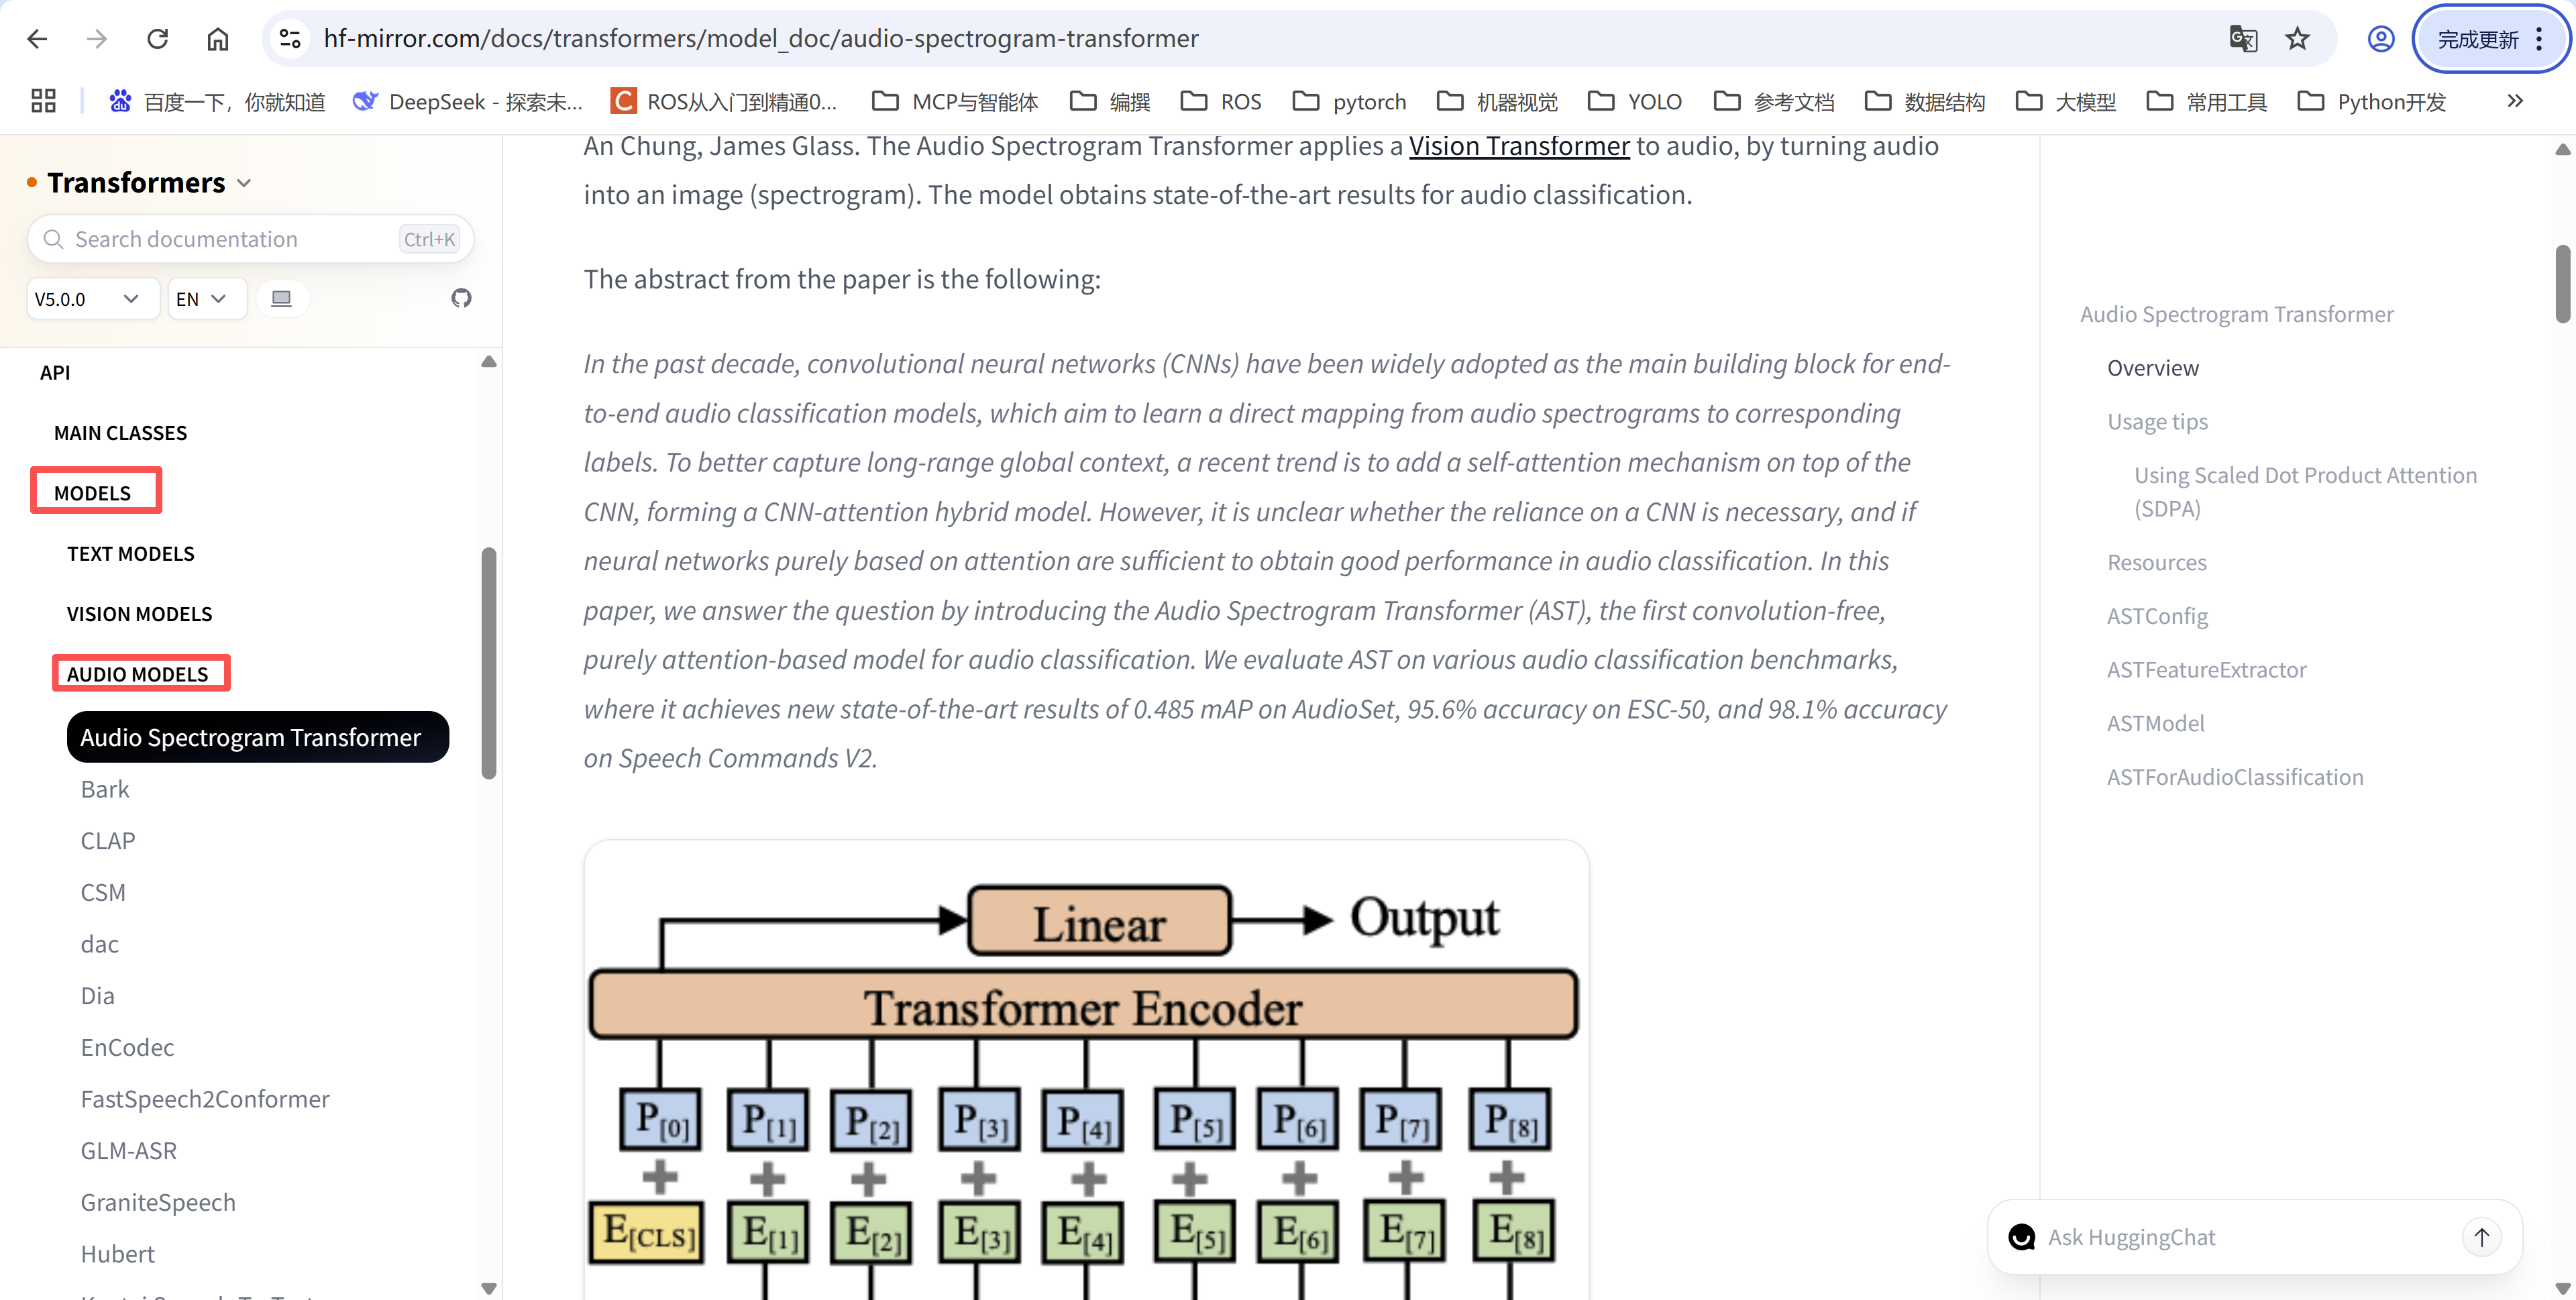

- 一般Transformers中的模型与特征提取类的实现，满足不了需求的时候，一般第三方就会提供第三方实现，第三方实现一般使用两种方式提供给用户：
    - 使用安装包，本地安装。
    - 打包在模型文件包中，通过设置remote_trust=True，在模型文件中直接加载这些模块，这种方式不需要安装（DeepSeek就是这样提供的）

- 在Transformers中，一个语音分类模型一般由四个核心文件构成（这四个核心的关系是显而易见的）：
    - ASTConfig：模型参数配置
    - ASTFeatureExtractor：特征提取器（这个特征提取器在Transformers5.0后，会使用Processor替代）
    - ASTModel：模型
    - ASTForAudioClassification：分类推理

- 不同的算法与实现就提供不同的模型、配置、推理的实现，在Transformers把经典的实现都封装在Transformers的标准模块中。比如：
    - Audio Spectrogram Transformer
    - Bark
    - ...

- AutoFeatureExtractor中最主要的函数是`__call__`：
    - raw_speech参数：输入需要编码的语音数据，类型只能是如下几种：
        - `np.ndarray`
        - `list[float]`
        - `list[np.ndarray]`
        - `list[list[float]]`
    - sampling_rate参数指定采样率，这个可以从数据集中获取。
    - return_tensors参数：设置返回的数据类型，只能指定如下值：
        - 'pt'：pytorch类型张量。
        - 'tf'：Tensorflow类型张量。
        - 'np'：numpy数组。
```python
__call__(
        self,
        raw_speech: Union[np.ndarray, list[float], list[np.ndarray], list[list[float]]],
        sampling_rate: Optional[int] = None,
        return_tensors: Optional[Union[str, TensorType]] = None,
        **kwargs,
    ) -> BatchFeature
```   

- 在调用AutoFeatureExtractor对语音数据抽取特征前，语音数据需要经过如下处理流程（找个可以取读AudioClassificationPipeline.preprocess函数源代码）：
    - 使用open函数读取语音文件.
    - 调用ffmpeg指令把语音二进制字节转换为numpy数组，这个过程在transformers中封装了一个函数, 可以直接调用。
        - `def ffmpeg_read(bpayload: bytes, sampling_rate: int) -> np.ndarray:`

In [24]:
from transformers import AutoFeatureExtractor, AutoModelForAudioClassification
import torch

wav_file = "./sounds/0a9f9af7_nohash_0.wav"
extractor = AutoFeatureExtractor.from_pretrained("F:/03Models/ast-finetuned-speech-commands-v2")
model = AutoModelForAudioClassification.from_pretrained("F:/03Models/ast-finetuned-speech-commands-v2")
print("模型的参数类型：", model.dtype)
# 读取音频文件
with open(wav_file, "rb") as f:
    inputs = f.read()

# 解析音频文件为numpy数组
from transformers.pipelines.audio_classification  import ffmpeg_read
inputs = ffmpeg_read(inputs, extractor.sampling_rate)  # 按照波特率预处理
# 调用AutoFeatureExtractor进行特征抽取，并转换为Tensor张量
processed = extractor(inputs, sampling_rate=extractor.sampling_rate, return_tensors="pt")
print("处理好的数据转换为与模型参数一样的类型：---------------------")
print(processed.to(model.dtype))

# outputs = model(processed["input_values"])  # 直接取值进行推理
outputs = model(**processed)  # 把字典转换为参数
print("预测结果:-------------------------------------------------")
print(outputs)
print("处理预测结果后的结果:-------------------------------------------------")
probs = outputs.logits[0].softmax(-1)
# probs = model_outputs.logits[0].sigmoid()
# 处理top_k
scores, ids = probs.topk(5)
# 转换为numpy数组
scores = scores.tolist()
ids = ids.tolist()
# 转换为标签名
results = [{"score": score, "label": model.config.id2label[_id]} for score, _id in zip(scores, ids)]
print(results)

模型的参数类型： torch.float32
处理好的数据转换为与模型参数一样的类型：---------------------
{'input_values': tensor([[[-0.5791, -0.6903, -0.3810,  ..., -0.3897, -0.5905, -0.6720],
         [-0.4367, -0.8172, -0.5848,  ..., -0.4078, -0.5422, -0.6486],
         [-0.7453, -0.7128, -0.4035,  ..., -0.3995, -0.6231, -0.6924],
         ...,
         [ 0.6150,  0.6150,  0.6150,  ...,  0.6150,  0.6150,  0.6150],
         [ 0.6150,  0.6150,  0.6150,  ...,  0.6150,  0.6150,  0.6150],
         [ 0.6150,  0.6150,  0.6150,  ...,  0.6150,  0.6150,  0.6150]]])}
预测结果:-------------------------------------------------
SequenceClassifierOutput(loss=None, logits=tensor([[-10.6507, -10.0460,  -9.5480,  -8.7305,  -9.4093,   5.7365, -10.2411,
          -8.2899,  -9.8675,  -8.9636, -10.4065,  -9.2418,  -9.2289,  -8.3533,
          -8.6913,  -9.3603, -10.3291,  -9.1755,  -9.1677, -10.7495,  -8.3023,
          -9.6505,  -8.9243,  -8.9165,  -8.8797,  -8.4139,  -8.9303,  -9.3424,
          -9.2944,  -8.3014,  -9.8256,  -9.3348,  -9.5123,  -

- 代码说明：
    - 提示：标签的获取从config配置文件中获取。
    - Tensor中的logits函数，把结果转换为概率形式。可以再用softmax与sigmoid函数处理下。
    - 代码中我们完整的演示了ASTFeatureExtractor对象的使用。
    - 同时演示了模型的调用，以及调用前的预处理与调用后的处理。
    - 掌握了推理，同时有Model实现代码，以及数据集，我们可以直接利用已有模型进行训练，当然数据集可以自己采集，并根据需要进行标注，然后训练自己的模型算子（权重）。关于transformers中训练自己的模型，我们有专门的主题讲解。

## 1.2. 语音分类应用

- 前面技术分析中，我们使用命令识别来讲解，下面我们介绍音频分类的其他应用。
    - 有的应用的底层实现与命令识别可能不一样，这一点可以深入理解，但是从分类的框架来说API是统一的。每种不同的实现，参数可能有一些细微差别。

### (1)

### (2)

### (3)

# 2. 音频转换与增强任务(Audio-to-Audio)

# 3. 语音识别任务(Automatic Speech Recognition)

# 4. 文本转语音任务(Text-to-Speech)

# 附录

- 以上的语音任务是来自HuggingFace的语音4大任务，在魔塔上还有更多的语音任务模型分类。比如：
    - 语音识别
    - 语音合成
    - 语音唤醒
    - 语音降噪
    - 回声消除
    - 语音分离
    - 音频分类
    - 音频生成
    - 说话人确认
    - 说话人日志
    - 标点预测
    - 时间戳预测
    - 语音端点检测
    - 困惑度计算
    - 语音语种识别
    - 音频量化编码
    - 音视频语音识别
    - 情绪识别
    - 逆文本正则化